In [0]:
#Loading the Reuters dataset
# This is a Single layer, multiclass classification!

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

print(len(train_data))
print(len(test_data))

8982
2246


In [0]:
# each example is a list of integers (word indices)
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [0]:
# Decoding newswires back to text

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [0]:
#encoding the data

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequences in enumerate(sequences):
    results[i, sequences] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
from keras.utils.np_utils import to_categorical
#to_one_hot

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
# model definition

from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
#compiling the model
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
#Setting aside a validation set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

#training the model

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 242us/step - loss: 2.5239 - acc: 0.4971 - val_loss: 1.7180 - val_acc: 0.6130
Epoch 2/20
7982/7982 [==============================] - 1s 166us/step - loss: 1.4440 - acc: 0.6884 - val_loss: 1.3495 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 168us/step - loss: 1.0979 - acc: 0.7641 - val_loss: 1.1749 - val_acc: 0.7410
Epoch 4/20
7982/7982 [==============================] - 1s 168us/step - loss: 0.8722 - acc: 0.8161 - val_loss: 1.0802 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 1s 169us/step - loss: 0.7058 - acc: 0.8483 - val_loss: 0.9870 - val_acc: 0.7840
Epoch 6/20
7982/7982 [==============================] - 1s 168us/step - loss: 0.5687 - acc: 0.8797 - val_loss: 0.9424 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 170us/step - loss: 0.4606 - acc: 0.9037 - val_loss: 0.9085 - val_acc: 0.8020


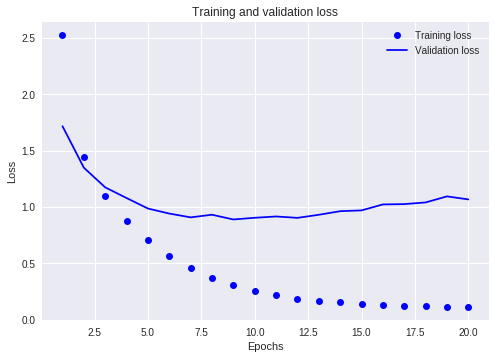

In [0]:
#plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

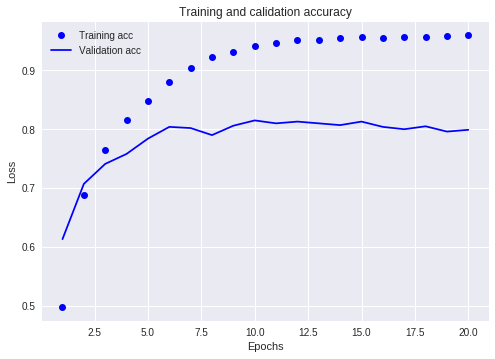

In [0]:
#plotting the training and validation accuracy

plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and calidation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
#retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 219us/step - loss: 2.6523 - acc: 0.4559 - val_loss: 1.6716 - val_acc: 0.6220
Epoch 2/9
7982/7982 [==============================] - 1s 150us/step - loss: 1.4297 - acc: 0.6809 - val_loss: 1.3297 - val_acc: 0.6910
Epoch 3/9
7982/7982 [==============================] - 1s 157us/step - loss: 1.1036 - acc: 0.7412 - val_loss: 1.1836 - val_acc: 0.7110
Epoch 4/9
7982/7982 [==============================] - 1s 158us/step - loss: 0.8878 - acc: 0.7925 - val_loss: 1.0723 - val_acc: 0.7680
Epoch 5/9
7982/7982 [==============================] - 1s 155us/step - loss: 0.7318 - acc: 0.8309 - val_loss: 1.0542 - val_acc: 0.7670
Epoch 6/9
7982/7982 [==============================] - 1s 154us/step - loss: 0.5813 - acc: 0.8652 - val_loss: 1.0052 - val_acc: 0.7890
Epoch 7/9
7982/7982 [==============================] - 1s 153us/step - loss: 0.4964 - acc: 0.8834 - val_loss: 1.0037 - val_acc: 0.7920
Epoch 8

In [0]:
results
#accuracy of ?

[1.2254912275771213, 0.747551202190209]

In [0]:
#generate predictions for new data
predictions = model.predict(x_test)

#each entry in predictions is a vector of length 46, where the coefficients in this vector
#sum to 1

# np.sum(predictions[0]) = 1.0

#the largest entry is the predicted class - the class with the highest probability
np.argmax(predictions[0])

3